In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.options.display.max_rows=99
sns.set()

In [2]:
df = pd.read_csv("../results/full_results_2024-02-23.csv")
df

,task,method,kmer,train_acc,val_acc,test_acc,time_train,time_total
0,cancer,dnabert-finetuned,3,NaN,NaN,0.862371,-,-
1,cancer,dnabert-finetuned,4,NaN,NaN,0.862371,-,-
2,cancer,dnabert-finetuned,5,NaN,NaN,0.862371,-,-
3,cancer,dnabert-finetuned,6,NaN,NaN,0.862371,-,-
4,celltype,dnabert-finetuned,3,NaN,NaN,0.094620,-,-
5,celltype,dnabert-finetuned,4,NaN,NaN,0.094620,-,-
6,celltype,dnabert-finetuned,5,NaN,NaN,0.197680,-,-
7,celltype,dnabert-finetuned,6,NaN,NaN,0.128228,-,-
8,tissue,dnabert-finetuned,3,NaN,NaN,0.385732,-,-
9,tissue,dnabert-finetuned,4,NaN,NaN,0.385732,-,-


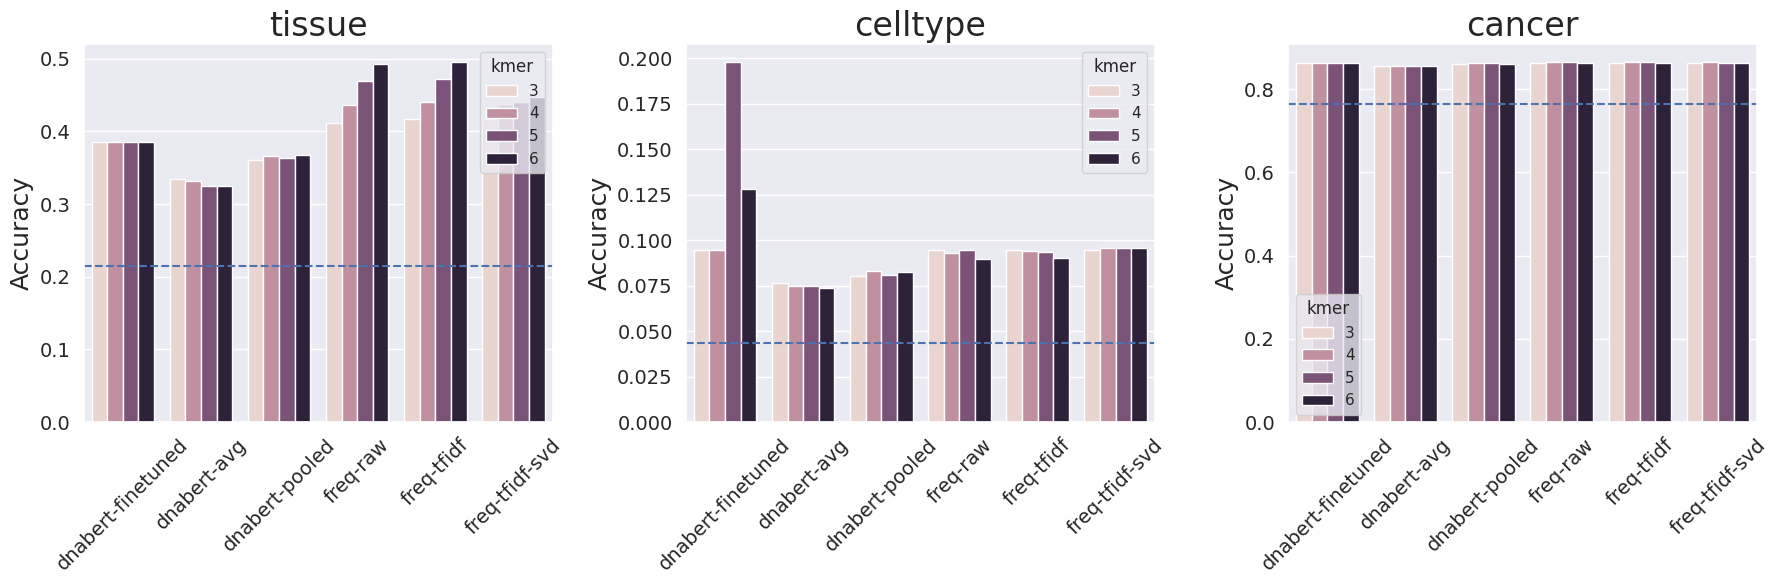

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

groups = df.groupby("task")
methods = ["dnabert-finetuned", "dnabert-avg", "dnabert-pooled", "freq-raw", "freq-tfidf", "freq-tfidf-svd"]
tasks = ["tissue", "celltype", "cancer"]

for ax, task in zip(axes.ravel(), tasks):
    group = groups.get_group(task)
    sns.barplot(data=group.query("method != 'random'"), x="method", hue="kmer", y="test_acc", order=methods, ax=ax)
    
    random_baseline = group.query("method == 'random'")["test_acc"].mean()
    ax.axhline(y=random_baseline, linestyle="--")

    ax.tick_params(axis='x', labelrotation=45, labelsize=14)
    ax.tick_params(axis='y', labelsize=14)

    ax.set_xlabel("")
    ax.set_ylabel("Accuracy", fontsize=18)
    ax.set_title(task, fontsize=24)

plt.tight_layout()
# plt.savefig("../figures/classification_results_2024-02-23.pdf", bbox_inches="tight")  # uncomment to save
plt.show()